# COGS 108 - EDA Checkpoint

# Names

- Aryaman Sinha
- Daryl Foo
- Jason Lin
- Jonny Tran
- Nathan Brodie

<a id='research_question'></a>
# Research Question

How did the 2019-20 NBA Bubble affect player performance in the 2019-20 playoffs compared to that of the previous 5 years (2014-15 to 2018-19)?

# Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Pre-Covid Data
players1415 = pd.read_csv("DataSetup/nba_1415.csv")
players1516 = pd.read_csv("DataSetup/nba_1516.csv")
players1617 = pd.read_csv("DataSetup/nba_1617.csv")
players1718 = pd.read_csv("DataSetup/nba_1718.csv")
players1819 = pd.read_csv("DataSetup/nba_1819.csv")

#Bubble data
players1920 = pd.read_csv("DataSetup/nba_1920.csv")

In [4]:
players1415.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Aaron Brooks,CHI,30,12,6,6,11.0,4.5,1.8,5.1,...,1.5,0.9,0.8,0.3,0.1,1.3,7.9,0,0,-3.2
1,Al Horford,ATL,29,16,8,8,32.6,14.4,6.7,13.2,...,8.6,3.7,1.6,0.8,1.4,2.1,35.5,7,0,2.5
2,Al-Farouq Aminu,DAL,24,5,1,4,30.0,11.2,3.4,6.2,...,7.2,1.2,1.2,2.0,1.6,3.0,31.2,1,0,3.6
3,Alan Anderson,BKN,32,6,2,4,23.6,11.0,4.2,6.8,...,3.5,1.2,1.3,0.7,0.2,1.5,18.1,0,0,2.3
4,Alexis Ajinca,NOP,27,3,0,3,3.5,2.7,1.3,1.3,...,0.3,0.3,0.0,0.3,0.0,0.7,4.6,0,0,-2.7


In [5]:
pre_covid = pd.concat([players1415, players1516, players1617, players1718, players1819], axis=0)
during_covid = players1920

# Data Cleaning

Describe your data cleaning steps here.

### Description of column names
- Player: The name of the player.
- Team: The abbreviation of the name of the team they play for.
- Age: The age of the player.
- GP: The number of games played by the player.
- W: The number of wins that player has on that team.
- L: The number of losses that player has on that team.
- MIN: The average number of minutes that player plays per game.
- PTS: The average number of points that player scores per game.
- FGM: The average number of field goals (shots) that player makes per game.
- FGA: The average number of field goals (shots) that player attempts per game.
- FG%: The percentage of field goals (shots) that player makes per game.
- 3PM: The average number of 3-point field goals that player makes per game.
- 3PA: The average number of 3-point field goals that player attempts per game.
- 3P%: The percentage of 3-point field goals that player makes per game.
- FTM: The average number of free throws that player makes per game.
- FTA: The average number of free throws that player attempts per game.
- FT%: The percentage of free throws that player makes per game.
- OREB: The average number of offensive rebounds that player makes per game.
- DREB: The average number of defensive rebounds that player makes per game.
- REB: The average number of total rebounds that player makes per game.
- AST: The average number of assists that player has per game.
- TOV: The average number of turnovers that player has per game.
- STL: The average number of steals that player has per game.
- BLK: The average number of blocks that player has per game.
- PF: The average number of fouls that player has per game (max:6).
- FP: The number of fantasy points that player has earned.
- DD2: The total number of double doubles that player has. (A double double is when a player has double digits in 2 statistical categories in a singl game.)
- TD3: The total number of triple doubles that player has. (A triple double is when a player has double digits in 3 statistical categories in a singl game.)
- +/-: The number of points scored by the player's team while the player is on the court compared to the opposing team.

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [6]:
dfs_list = [players1415, players1516, players1617, players1718, players1819, players1920]
years = ['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

<AxesSubplot:xlabel='Year', ylabel='Total +/-'>

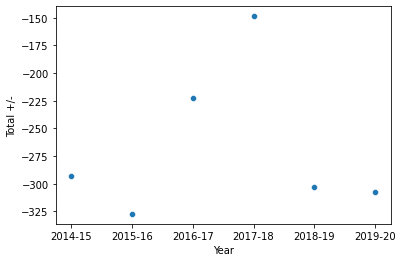

In [7]:
total_plus_minus = [sum(i['+/-']) for i in dfs_list]
# avg_plus_minus = [sum(players1415['+/-']), sum(players1516['+/-']), sum(players1617['+/-']),
#                   sum(players1718['+/-']), sum(players1819['+/-']), sum(players1920['+/-'])]
temp_df = pd.DataFrame({'Year': years, 'Total +/-': total_plus_minus})
sns.scatterplot(data=temp_df, x="Year", y="Total +/-")


This scatterplot is meant to display the total +/- of NBA players per year from the 2014-2015 Playoffs to the 2019-2020 Playoffs. +/- is a statistic tracked by the NBA that shows the effect that a player has on the score of a game. For example, when a player is on the court and his team scores 10 more points then he would have a +/- of 10. If his team scores 10 fewer points when he is on the court then he has a +/- of -10.

In [8]:
type(temp_df['Total +/-'][0])

numpy.float64

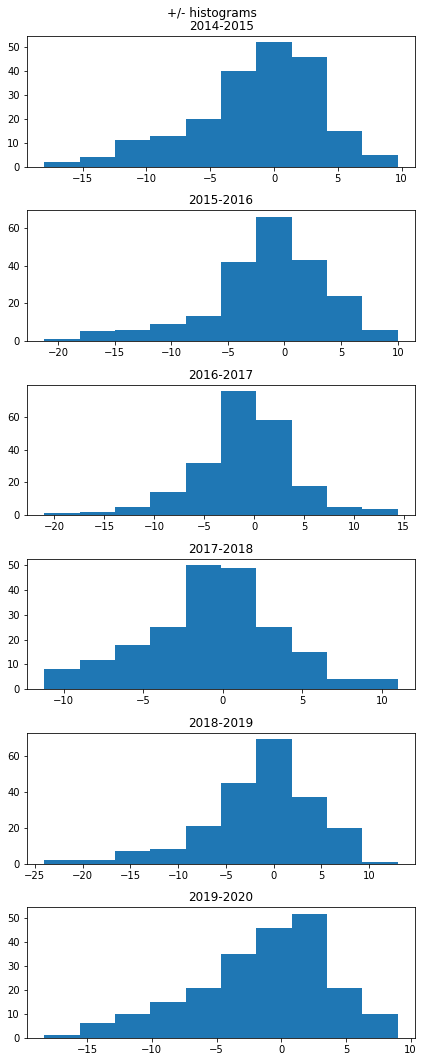

In [9]:
## YOUR CODE HERE
fig_plus, axs_plus = plt.subplots(6)
fig_plus.suptitle('+/- histograms')
fig_plus.set_figheight(15)
axs_plus[0].hist(players1415['+/-'])
axs_plus[0].title.set_text('2014-2015')

axs_plus[1].hist(players1516['+/-'])
axs_plus[1].title.set_text('2015-2016')

axs_plus[2].hist(players1617['+/-'])
axs_plus[2].title.set_text('2016-2017')

axs_plus[3].hist(players1718['+/-'])
axs_plus[3].title.set_text('2017-2018')

axs_plus[4].hist(players1819['+/-'])
axs_plus[4].title.set_text('2018-2019')

axs_plus[5].hist(players1920['+/-'])
axs_plus[5].title.set_text('2019-2020')
fig_plus.tight_layout()

There is nothing particularly out of the ordinary for the +/- data looking at these histograms. They all follow the similar normal distributions

In [10]:
players1415.columns

Index(['PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

<AxesSubplot:xlabel='Season', ylabel='Field Goal %'>

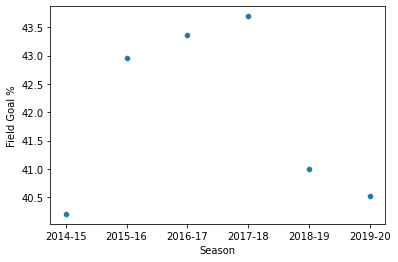

In [11]:
fg_percent = pd.DataFrame({'Season': years, 'Field Goal %': [(sum(i['FG%'])/len(i['FG%'])) for i in dfs_list]})
sns.scatterplot(data=fg_percent, x="Season", y="Field Goal %")




<AxesSubplot:xlabel='Seasons since 2014-15', ylabel='Field Goal %'>

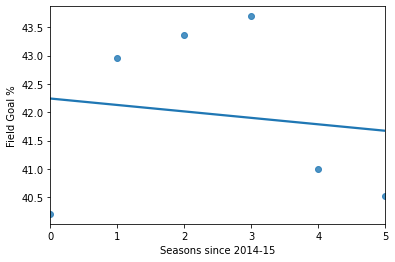

In [12]:
fg_line_percent = pd.DataFrame({'Seasons since 2014-15': [0, 1, 2, 3, 4, 5], 
                                'Field Goal %': [(sum(i['FG%'])/len(i['FG%'])) for i in dfs_list]})
sns.regplot(data=fg_line_percent, x="Seasons since 2014-15", y="Field Goal %", ci = None)

Not Enough Data Points for a line of best fit to be accurate

<AxesSubplot:xlabel='Season', ylabel='3 Point %'>

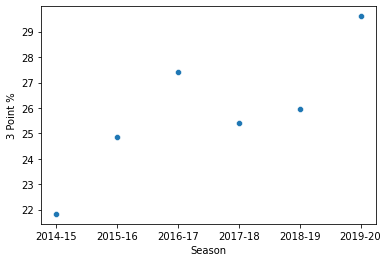

In [13]:
three_p = pd.DataFrame({'Season': years, '3 Point %': [(sum(i['3P%'])/len(i['3P%'])) for i in dfs_list]})
sns.scatterplot(data=three_p, x="Season", y="3 Point %")


Way more 3 Pointers in 19-20 Season

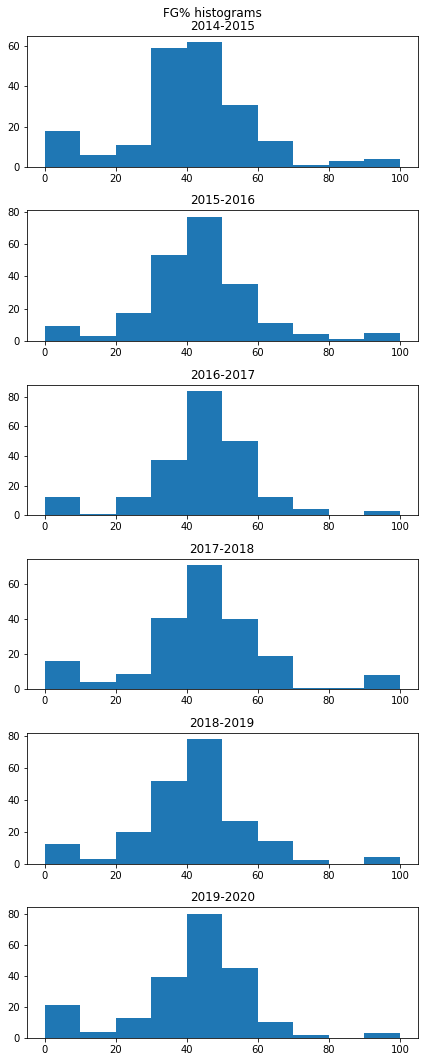

In [14]:
## YOUR CODE HERE
fig_fg, axs_fg = plt.subplots(6)
fig_fg.suptitle('FG% histograms')
fig_fg.set_figheight(15)
axs_fg[0].hist(players1415['FG%'])
axs_fg[0].title.set_text('2014-2015')

axs_fg[1].hist(players1516['FG%'])
axs_fg[1].title.set_text('2015-2016')

axs_fg[2].hist(players1617['FG%'])
axs_fg[2].title.set_text('2016-2017')

axs_fg[3].hist(players1718['FG%'])
axs_fg[3].title.set_text('2017-2018')

axs_fg[4].hist(players1819['FG%'])
axs_fg[4].title.set_text('2018-2019')

axs_fg[5].hist(players1920['FG%'])
axs_fg[5].title.set_text('2019-2020')
fig_fg.tight_layout()

Not much out of the ordinary here. There are a few data points that are distributed towards 0. By taking a look at these points, we see that the players that had this percentage are those players that attempted to score fiedl goals very little. This could be because they did not play as often or their position was not a position that looked to score much.

In [27]:
print('2014-2015 players with lower than 10 FG% average FGA: ' + str(players1415[players1415['FG%'] < 10]['FGA'].mean()))
print('2015-2016 players with lower than 10 FG% average FGA: ' + str(players1516[players1516['FG%'] < 10]['FGA'].mean()))
print('2016-2017 players with lower than 10 FG% average FGA: ' + str(players1617[players1617['FG%'] < 10]['FGA'].mean()))
print('2017-2018 players with lower than 10 FG% average FGA: ' + str(players1718[players1718['FG%'] < 10]['FGA'].mean()))
print('2018-2019 players with lower than 10 FG% average FGA: ' + str(players1819[players1819['FG%'] < 10]['FGA'].mean()))
print('2019-2020 players with lower than 10 FG% average FGA: ' + str(players1920[players1920['FG%'] < 10]['FGA'].mean()))

2014-2015 players with lower than 10 FG% average FGA: 0.6111111111111112
2015-2016 players with lower than 10 FG% average FGA: 0.5666666666666667
2016-2017 players with lower than 10 FG% average FGA: 0.6833333333333332
2017-2018 players with lower than 10 FG% average FGA: 0.45625000000000004
2018-2019 players with lower than 10 FG% average FGA: 0.9833333333333334
2019-2020 players with lower than 10 FG% average FGA: 0.5095238095238095


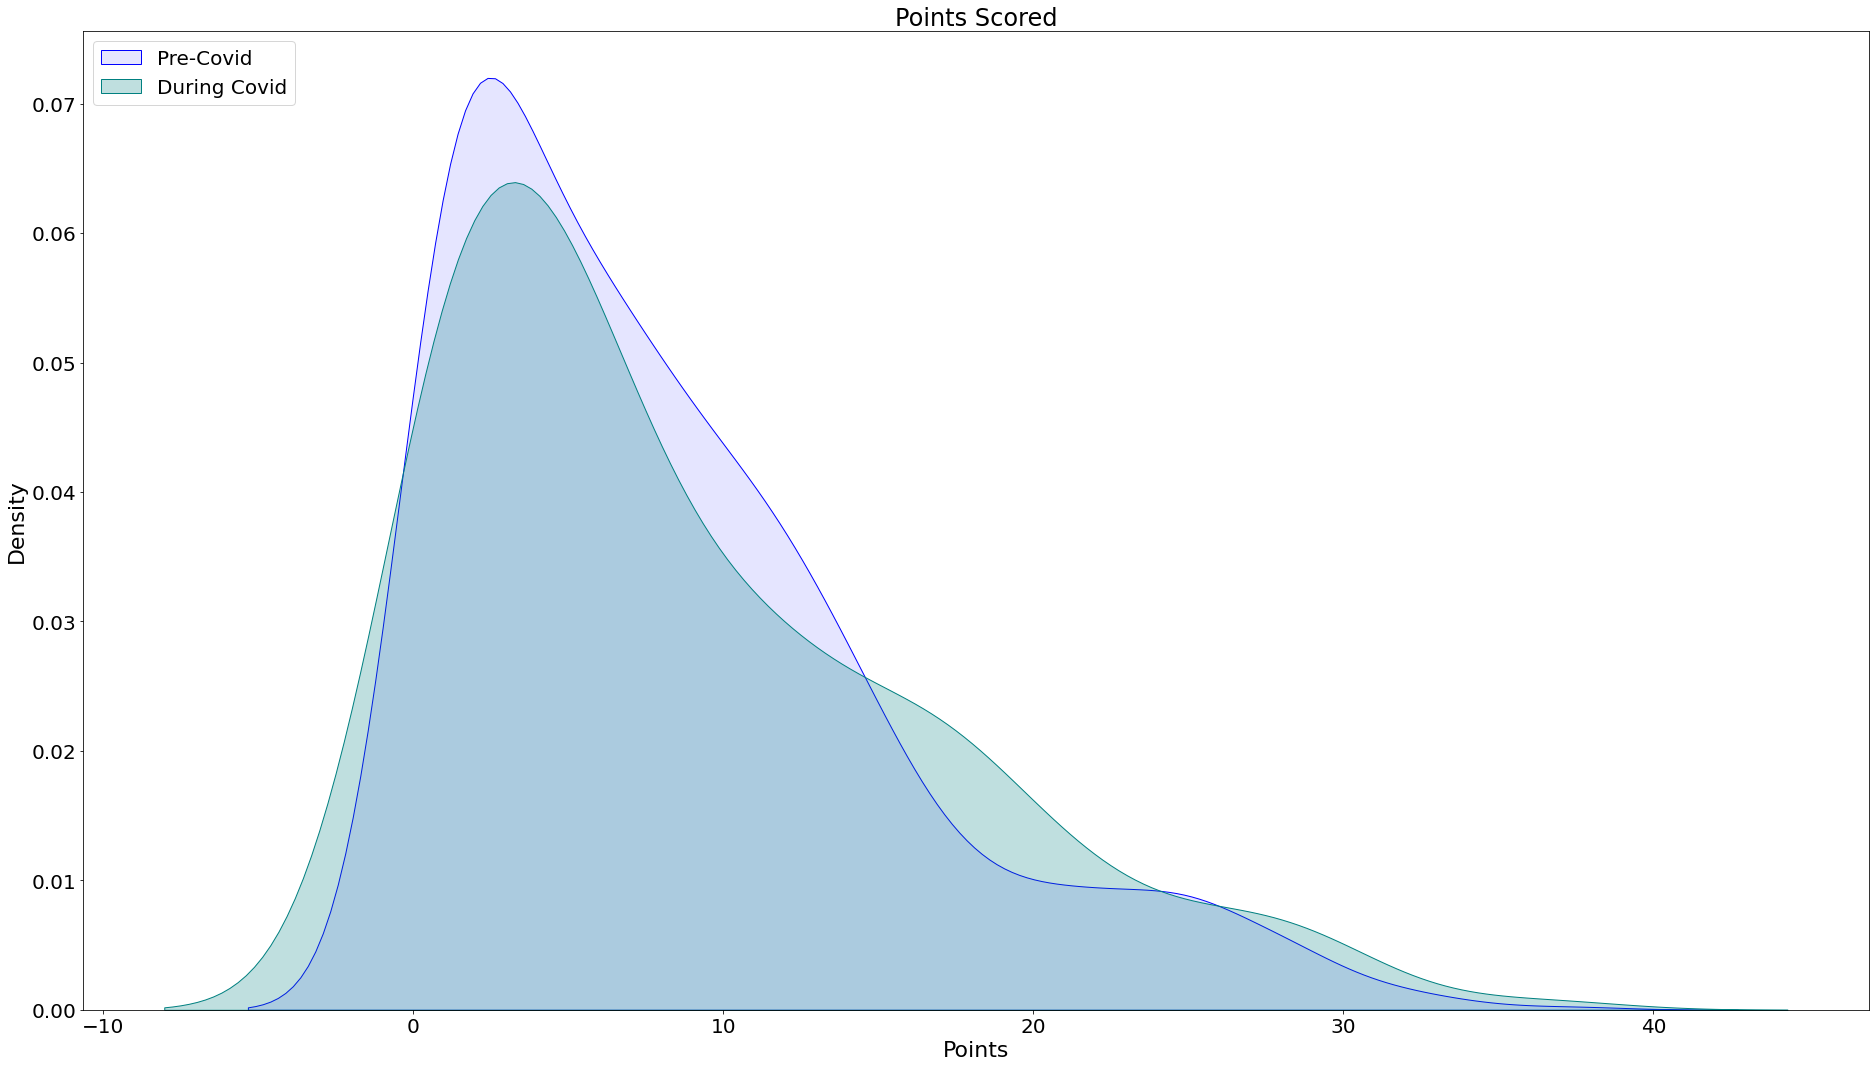

In [28]:
fig, ax = plt.subplots(figsize=(32,18))
# number of colors should be the number of histograms you'll have
colors = ['r', 'orange', 'y', 'g', 'blue', 'purple', 'gray', 'black', 'pink', 'teal', 'brown']

ax = sns.kdeplot(pre_covid['PTS'].values, color='blue', label='Pre-Covid',shade=True, alpha=0.1)
ax = sns.kdeplot(during_covid['PTS'].values, color='teal', label='During Covid', shade = True)

ax.legend(fontsize=20, loc='upper left')
ax.set_title("Points Scored", fontsize=24)
ax.set_ylabel("Density", fontsize=22)
ax.set_xlabel("Points", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)

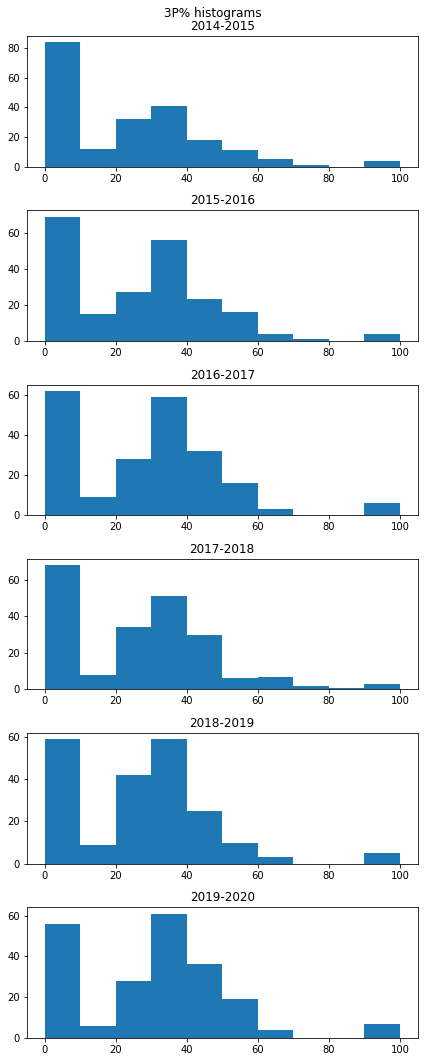

In [29]:
## YOUR CODE HERE
fig_3p, axs_3p = plt.subplots(6)
fig_3p.suptitle('3P% histograms')
fig_3p.set_figheight(15)
axs_3p[0].hist(players1415['3P%'])
axs_3p[0].title.set_text('2014-2015')

axs_3p[1].hist(players1516['3P%'])
axs_3p[1].title.set_text('2015-2016')

axs_3p[2].hist(players1617['3P%'])
axs_3p[2].title.set_text('2016-2017')

axs_3p[3].hist(players1718['3P%'])
axs_3p[3].title.set_text('2017-2018')

axs_3p[4].hist(players1819['3P%'])
axs_3p[4].title.set_text('2018-2019')

axs_3p[5].hist(players1920['3P%'])
axs_3p[5].title.set_text('2019-2020')
fig_3p.tight_layout()

Here we see that there is a large distribution of the players that lean towards the left boundary. By taking a look we see that the players that had this low percentage were players that tended to attempt 3 pointers very little or not at all. This can be explained as the players that these players did not play positions that expected them to shoot 3 pointers. As this data does not contain the players that we are interested in for these statistics, we made a separate table that took out players that made less than 0.5 attempts at 3 pointers and graphed them again.

In [30]:
print('2014-2015 players with lower than 10 3P% average 3PA: ' + str(players1415[players1415['3P%'] < 10]['3PA'].mean()))
print('2015-2016 players with lower than 10 3P% average 3PA: ' + str(players1516[players1516['3P%'] < 10]['3PA'].mean()))
print('2016-2017 players with lower than 10 3P% average 3PA: ' + str(players1617[players1617['3P%'] < 10]['3PA'].mean()))
print('2017-2018 players with lower than 10 3P% average 3PA: ' + str(players1718[players1718['3P%'] < 10]['3PA'].mean()))
print('2018-2019 players with lower than 10 3P% average 3PA: ' + str(players1819[players1819['3P%'] < 10]['3PA'].mean()))
print('2019-2020 players with lower than 10 3P% average 3PA: ' + str(players1920[players1920['3P%'] < 10]['3PA'].mean()))

2014-2015 players with lower than 10 3P% average 3PA: 0.2464285714285714
2015-2016 players with lower than 10 3P% average 3PA: 0.127536231884058
2016-2017 players with lower than 10 3P% average 3PA: 0.25322580645161286
2017-2018 players with lower than 10 3P% average 3PA: 0.18970588235294117
2018-2019 players with lower than 10 3P% average 3PA: 0.42033898305084744
2019-2020 players with lower than 10 3P% average 3PA: 0.3410714285714286


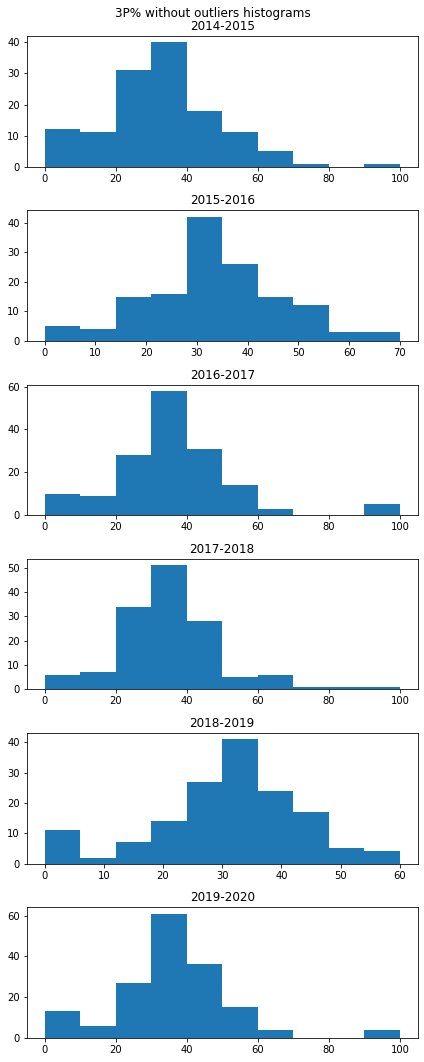

In [35]:
players1415_3P = players1415[players1415['3PA'] > 0.5]
players1516_3P = players1516[players1516['3PA'] > 0.5]
players1617_3P = players1617[players1617['3PA'] > 0.5]
players1718_3P = players1718[players1718['3PA'] > 0.5]
players1819_3P = players1819[players1819['3PA'] > 0.5]
players1920_3P = players1920[players1920['3PA'] > 0.5]

fig_3p_changed, axs_3p_changed = plt.subplots(6)
fig_3p_changed.suptitle('3P% without outliers histograms')
fig_3p_changed.set_figheight(15)
axs_3p_changed[0].hist(players1415_3P['3P%'])
axs_3p_changed[0].title.set_text('2014-2015')

axs_3p_changed[1].hist(players1516_3P['3P%'])
axs_3p_changed[1].title.set_text('2015-2016')

axs_3p_changed[2].hist(players1617_3P['3P%'])
axs_3p_changed[2].title.set_text('2016-2017')

axs_3p_changed[3].hist(players1718_3P['3P%'])
axs_3p_changed[3].title.set_text('2017-2018')

axs_3p_changed[4].hist(players1819_3P['3P%'])
axs_3p_changed[4].title.set_text('2018-2019')

axs_3p_changed[5].hist(players1920_3P['3P%'])
axs_3p_changed[5].title.set_text('2019-2020')
fig_3p_changed.tight_layout()

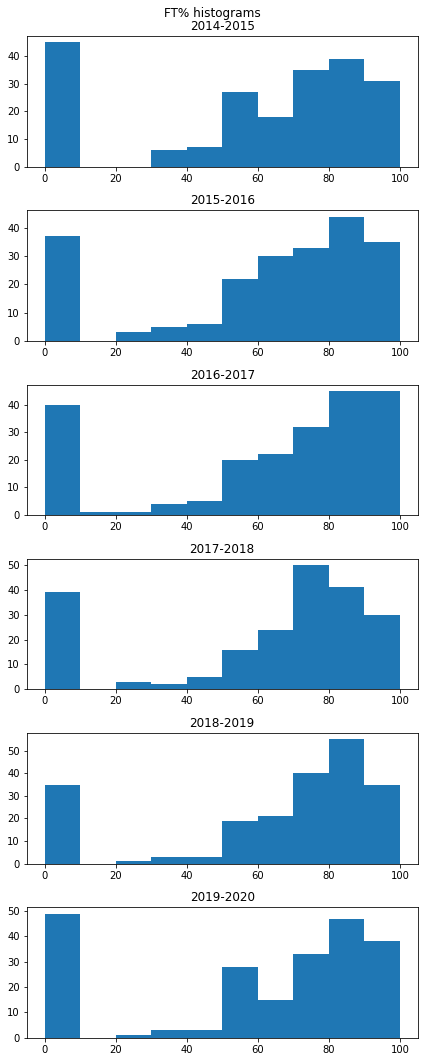

In [36]:
## YOUR CODE HERE
fig_ft, axs_ft = plt.subplots(6)
fig_ft.suptitle('FT% histograms')
fig_ft.set_figheight(15)
axs_ft[0].hist(players1415['FT%'])
axs_ft[0].title.set_text('2014-2015')

axs_ft[1].hist(players1516['FT%'])
axs_ft[1].title.set_text('2015-2016')

axs_ft[2].hist(players1617['FT%'])
axs_ft[2].title.set_text('2016-2017')

axs_ft[3].hist(players1718['FT%'])
axs_ft[3].title.set_text('2017-2018')

axs_ft[4].hist(players1819['FT%'])
axs_ft[4].title.set_text('2018-2019')

axs_ft[5].hist(players1920['FT%'])
axs_ft[5].title.set_text('2019-2020')
fig_ft.tight_layout()

Here we see that there is a large distribution of the players lean towards the left boundary. By taking a look we see that the players that had this low percentage were players that did not attempt free throws at all. This can be explained as free throws allow for a specific player to be selected to take the shot. All other players that aren't selected will never make a free throw. As this data does not contain the players that we are interested in for these statistics, we made a separate table that took out players that made no attempts at free throws and graphed them again.

In [32]:
print('2014-2015 players with lower than 10 FT% average FTA: ' + str(players1415[players1415['FT%'] < 10]['FTA'].mean()))
print('2015-2016 players with lower than 10 FT% average FTA: ' + str(players1516[players1516['FT%'] < 10]['FTA'].mean()))
print('2016-2017 players with lower than 10 FT% average FTA: ' + str(players1617[players1617['FT%'] < 10]['FTA'].mean()))
print('2017-2018 players with lower than 10 FT% average FTA: ' + str(players1718[players1718['FT%'] < 10]['FTA'].mean()))
print('2018-2019 players with lower than 10 FT% average FTA: ' + str(players1819[players1819['FT%'] < 10]['FTA'].mean()))
print('2019-2020 players with lower than 10 FT% average FTA: ' + str(players1920[players1920['FT%'] < 10]['FTA'].mean()))

2014-2015 players with lower than 10 FT% average FTA: 0.07333333333333333
2015-2016 players with lower than 10 FT% average FTA: 0.07027027027027027
2016-2017 players with lower than 10 FT% average FTA: 0.04
2017-2018 players with lower than 10 FT% average FTA: 0.05128205128205128
2018-2019 players with lower than 10 FT% average FTA: 0.08285714285714287
2019-2020 players with lower than 10 FT% average FTA: 0.05306122448979592


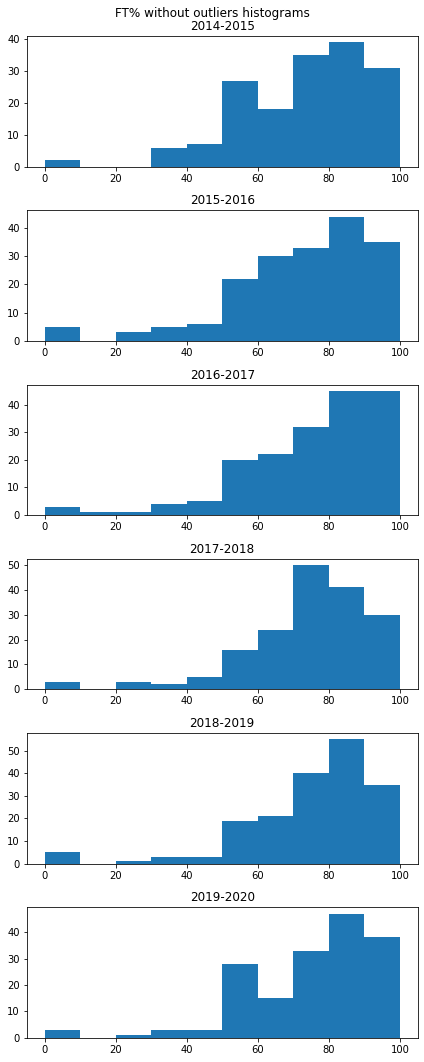

In [37]:
players1415_FT = players1415[players1415['FTA'] != 0]
players1516_FT = players1516[players1516['FTA'] != 0]
players1617_FT = players1617[players1617['FTA'] != 0]
players1718_FT = players1718[players1718['FTA'] != 0]
players1819_FT = players1819[players1819['FTA'] != 0]
players1920_FT = players1920[players1920['FTA'] != 0]

fig_ft_changed, axs_ft_changed = plt.subplots(6)
fig_ft_changed.suptitle('FT% without outliers histograms')
fig_ft_changed.set_figheight(15)
axs_ft_changed[0].hist(players1415_FT['FT%'])
axs_ft_changed[0].title.set_text('2014-2015')

axs_ft_changed[1].hist(players1516_FT['FT%'])
axs_ft_changed[1].title.set_text('2015-2016')

axs_ft_changed[2].hist(players1617_FT['FT%'])
axs_ft_changed[2].title.set_text('2016-2017')

axs_ft_changed[3].hist(players1718_FT['FT%'])
axs_ft_changed[3].title.set_text('2017-2018')

axs_ft_changed[4].hist(players1819_FT['FT%'])
axs_ft_changed[4].title.set_text('2018-2019')

axs_ft_changed[5].hist(players1920_FT['FT%'])
axs_ft_changed[5].title.set_text('2019-2020')
fig_ft_changed.tight_layout()